In [1]:
import pandas as pd

In [2]:
variants=pd.read_csv("Data/training_variants")

In [3]:
txt=pd.read_csv("Data/training_text_cleaned")

In [4]:
variants2=pd.read_csv("Data/test_variants")

In [11]:
txt2=pd.read_csv("Data/test_text", sep="||")

/Users/spilcer/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [12]:
txt2

,"ID,Text"
0,0||2. This mutation resulted in a myeloprolife...
1,1|| Abstract The Large Tumor Suppressor 1 (LAT...
2,2||Vascular endothelial growth factor receptor...
3,3||Inflammatory myofibroblastic tumor (IMT) is...
4,4|| Abstract Retinoblastoma is a pediatric ret...
5,5||The accurate determination of perfluoroalky...
6,6||Aberrations in the mTOR (mechanistic target...
7,7||Oncogenic mutations in the monomeric Casita...
8,8||NPM1 gene at chromosome 5q35 is involved in...
9,9||Introduction The epidermal growth factor re...


In [13]:
def appl(sent):
    if type(sent)==str:
        for i in range(5):
            if (sent[i]=="|"):
                return pd.Series(sent[i+2:])
    return sent

In [14]:
for i in range(5668):
    print i
    txt2.iloc[i,0]=appl(txt2.iloc[i,0])[0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226


3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129


5666
5667


In [15]:
txt2

,"ID,Text"
0,2. This mutation resulted in a myeloproliferat...
1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,Vascular endothelial growth factor receptor (V...
3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,Abstract Retinoblastoma is a pediatric retina...
5,The accurate determination of perfluoroalkyl s...
6,Aberrations in the mTOR (mechanistic target of...
7,Oncogenic mutations in the monomeric Casitas B...
8,NPM1 gene at chromosome 5q35 is involved in re...
9,Introduction The epidermal growth factor recep...


In [16]:
stopword_set=set(["i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now"])

In [17]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

In [18]:
def remove_stopwd(sentence,stop):
    if (type(sentence)!=list):
        result=[]
    else:
        result=[k for k in sentence if k not in stop]
    return result

In [20]:
txt=txt.Text

In [86]:
txt.size

3321

In [24]:
txt2=txt2.iloc[:,0]

In [26]:
txt=txt.str.replace("[\?\!\"\:\;\.\,\'\(\)\[\]\{\}]", "")
txt=txt.str.lower().str.split()

In [27]:
txt=txt.apply(lambda x: remove_stopwd(x,stopword_set))

In [28]:
txt2=txt2.str.replace("[\?\!\"\:\;\.\,\'\(\)\[\]\{\}]", "")
txt2=txt2.str.lower().str.split()

In [29]:
txt2=txt2.apply(lambda x: remove_stopwd(x,stopword_set))

In [30]:
doc2vec_corpus=[]
for i in range(3321):
    doc2vec_corpus.append(TaggedDocument(txt[i],["Diagnos_Train_"+str(i)]))

In [31]:
for i in range(5668):
    doc2vec_corpus.append(TaggedDocument(txt2[i],["Diagnos_Test_"+str(i)]))

In [39]:
len(doc2vec_corpus)

8989

In [40]:
doc2vec_model = Doc2Vec(doc2vec_corpus, dm = 0, alpha=0.1, size= 100, min_alpha=0.025)

In [42]:
doc2vec_model.save("Doc2Vec_on_all_data_alpha_0,1_size_100_minalpha_0,025")

In [44]:
doc2vec_model.docvecs.most_similar("Diagnos_Train_0")

[('Diagnos_Test_837', 0.8289840221405029),
 ('Diagnos_Test_66', 0.8209275007247925),
 ('Diagnos_Train_1504', 0.5709502696990967),
 ('Diagnos_Train_3097', 0.5576794147491455),
 ('Diagnos_Test_5275', 0.5471185445785522),
 ('Diagnos_Train_1904', 0.5369324088096619),
 ('Diagnos_Test_451', 0.5351311564445496),
 ('Diagnos_Test_2992', 0.530685305595398),
 ('Diagnos_Test_3775', 0.5246942043304443),
 ('Diagnos_Test_4939', 0.5139497518539429)]

In [49]:
variants.loc[3097]

ID                     3097
Gene                 NOTCH2
Variation    2010_2471trunc
Class                     2
Name: 3097, dtype: object

In [50]:
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

def plotDocs(model):
    docs_np = []
    #a list of labels (words)
    docs_label = []
    for doc in range(len(model)):
        docs_np.append(model[doc])
        docs_label.append(doc)
    print('Added %s words. Shape %s'%(len(docs_np),np.shape(docs_np)))

    pca = decomposition.PCA(n_components=2)
    pca.fit(docs_np)
    reduced= pca.transform(docs_np)

    # plt.plot(pca.explained_variance_ratio_)
    for index,vec in enumerate(reduced):
        # print ('%s %s'%(words_label[index],vec))
        if index <100:
            x,y=vec[0],vec[1]
            plt.scatter(x,y)
            plt.annotate(docs_label[index],xy=(x,y))
    plt.show()

Added 8989 words. Shape (8989, 100)


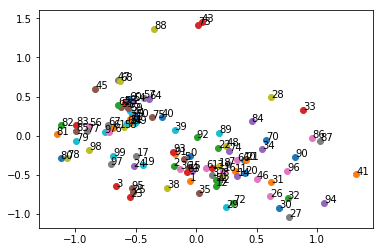

In [52]:
plotDocs(doc2vec_model.docvecs)

In [75]:
x=[]
for i in range(3000):
    x.append(list(doc2vec_model.docvecs[i]))

In [58]:
y_=list(variants.Class)
y=[]

In [59]:
for i in range(len(y_)):
    if y_[i]==1:
        y.append([1,0,0,0,0,0,0,0,0])
    elif y_[i]==2:
        y.append([0,1,0,0,0,0,0,0,0])
    elif y_[i]==3:
        y.append([0,0,1,0,0,0,0,0,0])
    elif y_[i]==4:
        y.append([0,0,0,1,0,0,0,0,0])
    elif y_[i]==5:
        y.append([0,0,0,0,1,0,0,0,0])
    elif y_[i]==6:
        y.append([0,0,0,0,0,1,0,0,0])
    elif y_[i]==7:
        y.append([0,0,0,0,0,0,1,0,0])
    elif y_[i]==8:
        y.append([0,0,0,0,0,0,0,1,0])
    elif y_[i]==9:
        y.append([0,0,0,0,0,0,0,0,1])

In [70]:
y[0]

[1, 0, 0, 0, 0, 0, 0, 0, 0]

In [141]:
from keras.layers import Dense, Activation
from keras.models import Sequential
import keras

model = Sequential()

model.add(Dense(256, input_dim=100, activation='relu'))
model.add(Dense(126, activation='relu'))

model.add(Dense(9, activation='softmax'))

In [144]:
import numpy as np
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [145]:
model.fit(np.array(x),y[:3000],epochs=20, batch_size=10,validation_split=.05)

Train on 2850 samples, validate on 150 samples
Epoch 1/20
2850/2850 [==============================] - 1s - loss: 0.0468 - acc: 0.9788 - val_loss: 0.5494 - val_acc: 0.8681
Epoch 2/20
2850/2850 [==============================] - 0s - loss: 0.0412 - acc: 0.9831 - val_loss: 0.5776 - val_acc: 0.8770
Epoch 3/20
2850/2850 [==============================] - 0s - loss: 0.0396 - acc: 0.9823 - val_loss: 0.6060 - val_acc: 0.8770
Epoch 4/20
2850/2850 [==============================] - 0s - loss: 0.0389 - acc: 0.9840 - val_loss: 0.5711 - val_acc: 0.8778
Epoch 5/20
2850/2850 [==============================] - 1s - loss: 0.0362 - acc: 0.9860 - val_loss: 0.5713 - val_acc: 0.8874
Epoch 6/20
2850/2850 [==============================] - 1s - loss: 0.0361 - acc: 0.9865 - val_loss: 0.5965 - val_acc: 0.8785
Epoch 7/20
2850/2850 [==============================] - 1s - loss: 0.0315 - acc: 0.9873 - val_loss: 0.6456 - val_acc: 0.8726
Epoch 8/20
2850/2850 [==============================] - 1s - loss: 0.0305 - ac

In [87]:
model.predict(np.array([doc2vec_model.docvecs[10+3321]]))

array([[  4.10369568e-04,   7.70534575e-01,   1.03452861e-04,
          1.17926458e-04,   3.98497097e-03,   4.91027497e-02,
          1.75185263e-01,   5.54732454e-04,   5.98631550e-06]], dtype=float32)

In [88]:
results=[]
for i in range(5668):
    results.append(model.predict(np.array([doc2vec_model.docvecs[i+3321]])))

In [105]:
results[0][0]

array([  1.73794222e-04,   9.63654667e-02,   1.53237613e-06,
         1.90228384e-05,   4.34686750e-04,   2.71505341e-02,
         8.75832140e-01,   1.82123222e-05,   4.57836995e-06], dtype=float32)

In [106]:
results_sized=[]
for i in range(5668):
    results_sized.append(results[i][0])

In [140]:
model_json = model.to_json()
with open("model_100_features_test_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_100_features_test_2.h5")
print("Saved model to disk")

Saved model to disk


In [108]:
results_sized[0].shape

(9,)

In [110]:
pd.DataFrame(results_sized, columns=["Score_class1","Score_class2","Score_class3","Score_class4","Score_class5","Score_class6","Score_class7","Score_class8","Score_class9"]).to_csv("Results/Model_processed_on_test_set.csv")

In [ ]:
ID,class1,class2,class3,class4,class5,class6,class7,class8,class9

In [118]:
results_proba=[]

In [117]:
results_sized[0]

array([  1.73794222e-04,   9.63654667e-02,   1.53237613e-06,
         1.90228384e-05,   4.34686750e-04,   2.71505341e-02,
         8.75832140e-01,   1.82123222e-05,   4.57836995e-06], dtype=float32)

In [119]:
for i in range(5668):
    summ=0
    vect=[i]
    for j in range(9):
        summ=summ+results_sized[i][j]
    for j in range(9):
        vect.append(results_sized[i][j]/summ)
    results_proba.append(vect)

In [126]:
pd.DataFrame(results_proba, columns=["ID","class1","class2","class3","class4","class5","class6","class7","class8","class9"]).to_csv("Results/Proba_classes.csv", index_col = False)

In [128]:
pd.read_csv("Results/Proba_classes.csv")

,Unnamed: 0,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0,1.737942e-04,9.636547e-02,1.532376e-06,1.902284e-05,4.346868e-04,2.715053e-02,8.758322e-01,1.821232e-05,4.578370e-06
1,1,1,1.042550e-03,4.127161e-03,3.374084e-05,9.811260e-01,1.004308e-04,3.373114e-04,1.276010e-02,3.374737e-04,1.352525e-04
2,2,2,4.506731e-02,6.594875e-02,2.670129e-02,3.041411e-01,1.889710e-02,1.452520e-02,5.243924e-01,1.660946e-04,1.607517e-04
3,3,3,1.756612e-04,5.237048e-02,5.690160e-04,2.318193e-05,5.637152e-05,1.143922e-03,9.455988e-01,6.042535e-05,2.126664e-06
4,4,4,1.254188e-03,7.457863e-02,1.034176e-03,2.852528e-01,6.758845e-03,6.212975e-01,1.369861e-03,7.068215e-03,1.385858e-03
5,5,5,9.626061e-02,7.285071e-05,8.764778e-08,8.951533e-01,6.659335e-05,8.257493e-03,1.876521e-04,9.886813e-08,1.273720e-06
6,6,6,4.891405e-02,8.822872e-07,1.579649e-04,9.471134e-01,1.213836e-03,2.596847e-03,2.523870e-06,1.242661e-07,4.186033e-07
7,7,7,1.347766e-05,3.647786e-03,4.978541e-07,1.099937e-05,3.284094e-07,9.049257e-05,9.938570e-01,2.360004e-03,1.936671e-05
8,8,8,3.938067e-04,1.316201e-01,1.659019e-07,1.034223e-07,1.201039e-04,1.233566e-03,8.666310e-01,1.026904e-06,1.570773e-07
9,9,9,3.798965e-07,7.297261e-08,4.670238e-08,4.359879e-08,6.003633e-10,3.186342e-06,9.999886e-01,4.454286e-06,3.184607e-06


In [129]:
vectors=[[1,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,1]]

In [133]:
vectors[8][8]

1

In [134]:
def selected_class(res):
    maxi=res[0]
    indice=0
    for i in range(9):
        if res[i]>maxi:
            indice=i
            maxi=res[indice]
    return vectors[indice]

In [135]:
new_results_proba=[]

In [137]:
for i in range(5668):
    summ=0
    vect=[i]+selected_class(results_sized[i])
    new_results_proba.append(vect)

In [138]:
new_results_proba

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [4, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [5, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [6, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [7, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [8, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [10, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [11, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [12, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [13, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [14, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [15, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [16, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [17, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [18, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [19, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [20, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [21, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [22, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [23, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [24, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [25, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [26, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [27, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [28, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [29, 0, 0, 0, 1, 0, 0, 

In [139]:
pd.DataFrame(new_results_proba, columns=["ID","class1","class2","class3","class4","class5","class6","class7","class8","class9"]).to_csv("Results/Proba_classes.csv", index_col = False)